# Chapter 5: Dependency parsing
https://nlp100.github.io/en/ch05.html The zip archive ai.en.zip contains the text of the Wikipedia article, “Artificial Intelligence”. Apply a dependency parser to the text, and store the result in a file. Implement programs that read the dependency trees and perform the jobs.

For your convenience, the zip archive also includes ai.en.txt.json, the text with dependency trees predicted by Stanford CoreNLP and stored in JSON format.

<hr>

## 40. Read the parse result (words)

Design a class Word that represents a word. This class has three member variables, text (word surface), lemma (lemma), and pos (part-of-speech). Represent a sentence as an array of instances of Word class. Implement a program to load the parse result, and store the text as an array of sentences. Show the object of the first sentence of the body of the article.

In [1]:
import re
import pandas as pd
import json

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

basePath = "/content/drive/MyDrive/nlp100/Dataset/ai-en/"
rawtext = "ai.en.txt"
jsn = 'ai.en.txt.json'

f = open(basePath + rawtext, 'r', encoding = "ISO-8859-1")
aiRaw = f.read()
aiRaw = re.sub(r"\n", r" ", aiRaw)
aiRaw = aiRaw.strip()
aiRawPerSentence = aiRaw.split(".")

f = open(basePath + jsn, 'r')
aiJson = json.load(f)

Mounted at /content/drive


In [2]:
aiRaw[:500]

'In computer science, artificial intelligence (AI), sometimes called machine intelligence, is intelligence demonstrated by machines, in contrast to the natural intelligence displayed by humans and animals. Leading AI textbooks define the field as the study of "intelligent agents": any device that perceives its environment and takes actions that maximize its chance of successfully achieving its goals. Colloquially, the term "artificial intelligence" is often used to describe machines (or computers'

In [3]:
class Ai:
  def __init__(self, pathJsn):
    self._sentences = []
    self._aiJson = []

    f = open(basePath + jsn, 'r')
    self._aiJson = json.load(f)

    currentSentence = []

    for i, sentence in enumerate(self._aiJson['sentences']):
      for j, word in enumerate(sentence['tokens']):
        a = self.Word(
            text = word['word'],
            lemma = word['lemma'],
            pos = word['pos'],
        )
        
        currentSentence.append(a)

      self._sentences.append(currentSentence)
      currentSentence = []

  class Word:
    def __init__(self, text, lemma, pos):
      self._text = text
      self._lemma = lemma
      self._pos = pos

In [4]:
ai = Ai(basePath + jsn)

for index, word in enumerate(ai._sentences[0]):
  print("==== index",index,"====")
  print("text\t:", word._text)
  print("lemma\t:",word._lemma)
  print("pos\t:", word._pos)

==== index 0 ====
text	: In
lemma	: in
pos	: IN
==== index 1 ====
text	: computer
lemma	: computer
pos	: NN
==== index 2 ====
text	: science
lemma	: science
pos	: NN
==== index 3 ====
text	: ,
lemma	: ,
pos	: ,
==== index 4 ====
text	: artificial
lemma	: artificial
pos	: JJ
==== index 5 ====
text	: intelligence
lemma	: intelligence
pos	: NN
==== index 6 ====
text	: -LRB-
lemma	: -lrb-
pos	: -LRB-
==== index 7 ====
text	: AI
lemma	: ai
pos	: NN
==== index 8 ====
text	: -RRB-
lemma	: -rrb-
pos	: -RRB-
==== index 9 ====
text	: ,
lemma	: ,
pos	: ,
==== index 10 ====
text	: sometimes
lemma	: sometimes
pos	: RB
==== index 11 ====
text	: called
lemma	: call
pos	: VBN
==== index 12 ====
text	: machine
lemma	: machine
pos	: NN
==== index 13 ====
text	: intelligence
lemma	: intelligence
pos	: NN
==== index 14 ====
text	: ,
lemma	: ,
pos	: ,
==== index 15 ====
text	: is
lemma	: be
pos	: VBZ
==== index 16 ====
text	: intelligence
lemma	: intelligence
pos	: NN
==== index 17 ====
text	: demonstrated

<hr>

## 41. Read the parse result (dependency)

In addition to problem 40, add three member variables head (a reference to the object of its syntactic governor), dep (dependency type to its governor), and children (a list of references to the syntactic dependents in the parse tree) to the class Word. Show the pairs of governors (parents) and their dependents (children) of the first sentence of the body of the article. Use the class Word in the rest of the problems in this chapter.

In [81]:
class Ai:
  def __init__(self, pathJsn):
    self._sentences = []
    self._aiJson = []

    f = open(basePath + jsn, 'r')
    self._aiJson = json.load(f)

    currentSentence = []

    for i, sentence in enumerate(self._aiJson['sentences']):
      for j, word in enumerate(sentence['tokens']):
        for k, dic in enumerate(sentence['basicDependencies']):
          if dic['dependentGloss'] == word['word']:

            a = self.Word(
                id = j+1,
                text = word['word'],
                lemma = word['lemma'],
                pos = word['pos'],
                head = dic['governorGloss'],
                headId = dic['governor'],
                dep = dic['dep'],
            )
        
        currentSentence.append(a)

      self._sentences.append(currentSentence)
      currentSentence = []

  class Word:
    def __init__(self, id, text, lemma, pos, head, headId, dep):
      self._id = id
      self._text = text
      self._lemma = lemma
      self._pos = pos

      self._head = head
      self._headId = headId
      self._dep = dep


In [83]:
ai = Ai(basePath + jsn)

for index, word in enumerate(ai._sentences[0]):
  print("==== index",index,"====")
  print("id\t:", word._id)
  print("text\t:", word._text)
  print("lemma\t:",word._lemma)
  print("pos\t:", word._pos)
  print("head\t:", word._head)
  print("dep\t:", word._dep)


==== index 0 ====
id	: 1
text	: In
lemma	: in
pos	: IN
head	: science
dep	: case
==== index 1 ====
id	: 2
text	: computer
lemma	: computer
pos	: NN
head	: science
dep	: compound
==== index 2 ====
id	: 3
text	: science
lemma	: science
pos	: NN
head	: called
dep	: nmod
==== index 3 ====
id	: 4
text	: ,
lemma	: ,
pos	: ,
head	: intelligence
dep	: punct
==== index 4 ====
id	: 5
text	: artificial
lemma	: artificial
pos	: JJ
head	: intelligence
dep	: amod
==== index 5 ====
id	: 6
text	: intelligence
lemma	: intelligence
pos	: NN
head	: contrast
dep	: nmod
==== index 6 ====
id	: 7
text	: -LRB-
lemma	: -lrb-
pos	: -LRB-
head	: AI
dep	: punct
==== index 7 ====
id	: 8
text	: AI
lemma	: ai
pos	: NN
head	: intelligence
dep	: appos
==== index 8 ====
id	: 9
text	: -RRB-
lemma	: -rrb-
pos	: -RRB-
head	: AI
dep	: punct
==== index 9 ====
id	: 10
text	: ,
lemma	: ,
pos	: ,
head	: intelligence
dep	: punct
==== index 10 ====
id	: 11
text	: sometimes
lemma	: sometimes
pos	: RB
head	: called
dep	: advmod
==

<hr>

## 42. Show root words
For each sentence, extract the root word (whose head is ROOT).

In [84]:
for i, sentence in enumerate(ai._sentences[:4]):
  for j, word in enumerate(sentence):
    if word._head == 'ROOT':
      print(word._text,"is the root of sentence ",i)

called is the root of sentence  0
define is the root of sentence  1
used is the root of sentence  2
removed is the root of sentence  3


<hr>

## 43. Show verb governors and noun dependents
Show all pairs of verb governors (parents) and their noun dependents (children) from all sentences in the text.

In [85]:
for i, sentence in enumerate(ai._sentences[:1]):
  print("======= sentence",i,"=======")
  for j, word in enumerate(sentence):
    print("parent\t: ",word._head," \t\tchild\t: ",word._text)

======= sentence 0 =======
parent	:  science  		child	:  In
parent	:  science  		child	:  computer
parent	:  called  		child	:  science
parent	:  intelligence  		child	:  ,
parent	:  intelligence  		child	:  artificial
parent	:  contrast  		child	:  intelligence
parent	:  AI  		child	:  -LRB-
parent	:  intelligence  		child	:  AI
parent	:  AI  		child	:  -RRB-
parent	:  intelligence  		child	:  ,
parent	:  called  		child	:  sometimes
parent	:  ROOT  		child	:  called
parent	:  intelligence  		child	:  machine
parent	:  contrast  		child	:  intelligence
parent	:  intelligence  		child	:  ,
parent	:  called  		child	:  is
parent	:  contrast  		child	:  intelligence
parent	:  intelligence  		child	:  demonstrated
parent	:  humans  		child	:  by
parent	:  demonstrated  		child	:  machines
parent	:  intelligence  		child	:  ,
parent	:  contrast  		child	:  in
parent	:  intelligence  		child	:  contrast
parent	:  intelligence  		child	:  to
parent	:  intelligence  		child	:  the
parent	:  i

<hr>

## 44. Visualize dependency trees
Visualize a dependency tree of a sentence as a directed graph. Consider converting a dependency tree into DOT language and use Graphviz for drawing a directed graph. In addition, you can use pydot for drawing a dependency tree.

In [86]:
from graphviz import Digraph

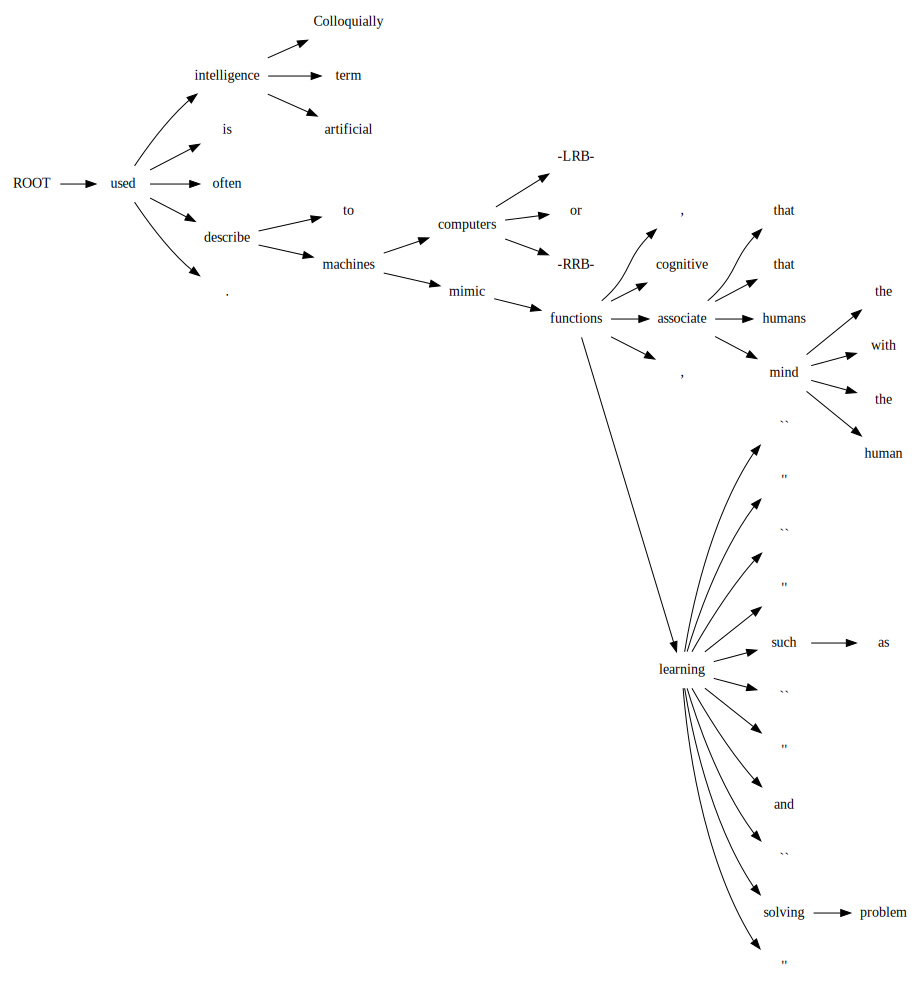

In [129]:
dot = Digraph(node_attr={'shape': 'plaintext'})
dot.attr(rankdir='LR')
dot.node(str(0), "ROOT")
for  word in ai._sentences[2]:
  dot.node(str(word._id), word._text)

for word in ai._sentences[2]:
  dot.edge(str(word._headId), str(word._id))

dot

<hr>

## 45. Triple with subject, verb, and direct object
We are interested in extracting facts from the text. In this chapter, we represent a fact as a tuple of (subject, predicate, object). Extract tuples from dependency trees where:
*   subject is a nominal subject of a verb in the past tense
*   predicate is the verb in the past tense
*   object is a direct object of the verb

Consider an example sentence, “Frank Rosenblatt invented the perceptron”. We want to extract a tuple, (Rosenblatt, invented, perceptron), from the sentence. In this problem, we only consider a subject and object as a single word.

This graph shows a dependency tree for the sentence (this may vary depending on the parser).

<i> check the site for the image </i>

In order to extract a tuple from a dependency tree, it may be a good idea to design an extraction rule on the dependency tree, for example,

<i> check the site for the image </i>

### Rule: no restriction



In [89]:
for i, sentence in enumerate(ai._sentences):
  vbds = []
  vbdsId = [] # this Id is needed because some words occured multiple times (distinct each same word in a sentence)

  for j, word in enumerate(sentence):
    if word._pos == "VBD": 
      vbds.append(word._text)
      vbdsId.append(j+1)

  for e, vbd in enumerate(vbds):
    subj = []
    obj = []
    
    for _, word in enumerate(sentence):
      if word._head == vbd and word._headId == vbdsId[e] and word._text != word._head and word._text not in [",", "`", ";",".",":"]:
        if word._dep == "nsubj": subj.append(word._text)
        if word._dep == "dobj": obj.append(word._text)

    if subj and obj:
      print(i, subj, "----", vbd, "----", obj)

23 ['characters'] ---- raised ---- ['many']
27 ['this'] ---- led ---- ['researchers']
32 ['They'] ---- produced ---- ['programs']
37 ['governments'] ---- cut ---- ['research']
41 ['project'] ---- inspired ---- ['U.S']
48 ['match'] ---- defeated ---- ['champions']
49 ['computers'] ---- enabled ---- ['advances']
51 ['AlphaGo'] ---- won ---- ['4', 'games']
52 ['AlphaGo'] ---- won ---- ['match']
52 ['who'] ---- held ---- ['ranking']
53 ['This'] ---- marked ---- ['completion']
58 ['they'] ---- had ---- ['AI']
59 ['China'] ---- accelerated ---- ['funding']
88 ['that'] ---- undiscovered ---- ['swans']
99 ['they'] ---- advocated ---- ['violence']
113 ['researchers'] ---- developed ---- ['algorithms']
176 ['DeepMind'] ---- developed ---- ['intelligence']
189 ['number'] ---- explored ---- ['connection']
190 ['Some'] ---- built ---- ['machines']
190 ['that'] ---- used ---- ['networks']
194 ['one'] ---- developed ---- ['style']
199 ['Simon'] ---- studied ---- ['skills']
199 ['work'] ---- laid ----

### Rule: subject must be NNP or NN


In [90]:
for i, sentence in enumerate(ai._sentences):
  vbds = []
  vbdsId = []

  for j, word in enumerate(sentence):
    if word._pos == "VBD": 
      vbds.append(word._text)
      vbdsId.append(j+1)

  for e, vbd in enumerate(vbds):
    subj = []
    obj = []
    
    for _, word in enumerate(sentence):
      if word._head == vbd and word._headId == vbdsId[e] and word._text != word._head and word._text not in [",", "`", ";",".",":"]:
        if word._dep == "nsubj" and word._pos in ["NNP","NN"]: subj.append(word._text)
        if word._dep == "dobj": obj.append(word._text)

    if subj and obj:
      print(i, subj, "----", vbd, "----", obj)

41 ['project'] ---- inspired ---- ['U.S']
48 ['match'] ---- defeated ---- ['champions']
51 ['AlphaGo'] ---- won ---- ['4', 'games']
52 ['AlphaGo'] ---- won ---- ['match']
59 ['China'] ---- accelerated ---- ['funding']
176 ['DeepMind'] ---- developed ---- ['intelligence']
189 ['number'] ---- explored ---- ['connection']
199 ['Simon'] ---- studied ---- ['skills']
199 ['work'] ---- laid ---- ['foundations']
200 ['team'] ---- used ---- ['results']
206 ['Schank'] ---- described ---- ['approaches']
209 ['revolution'] ---- led ---- ['form']
226 ['language'] ---- permitted ---- ['level']
302 ['Rosenblatt'] ---- invented ---- ['perceptron']
316 ['Aizenberg'] ---- introduced ---- ['it']
320 ['publication'] ---- introduced ---- ['way']
324 ['LeCun'] ---- applied ---- ['backpropagation']
332 ['NN'] ---- called ---- ['network']
335 ['recognition'] ---- experienced ---- ['jump']
336 ['Google'] ---- used ---- ['LSTM']
344 ['AlphaGo'] ---- brought ---- ['era']
369 ['formula'] ---- determined ---- ['do

### Rule: subject must be NNP



In [91]:
for i, sentence in enumerate(ai._sentences):
  vbds = []
  vbdsId = []

  for j, word in enumerate(sentence):
    if word._pos == "VBD": 
      vbds.append(word._text)
      vbdsId.append(j+1)

  for e, vbd in enumerate(vbds):
    subj = []
    obj = []
    
    for _, word in enumerate(sentence):
      if word._head == vbd and word._headId == vbdsId[e] and word._text != word._head and word._text not in [",", "`", ";",".",":"]:
        if word._dep == "nsubj" and word._pos == "NNP": subj.append(word._text)
        if word._dep == "dobj": obj.append(word._text)
  
    if subj and obj:
      print(i, subj, "----", vbd, "----", obj)

51 ['AlphaGo'] ---- won ---- ['4', 'games']
52 ['AlphaGo'] ---- won ---- ['match']
59 ['China'] ---- accelerated ---- ['funding']
176 ['DeepMind'] ---- developed ---- ['intelligence']
199 ['Simon'] ---- studied ---- ['skills']
206 ['Schank'] ---- described ---- ['approaches']
302 ['Rosenblatt'] ---- invented ---- ['perceptron']
316 ['Aizenberg'] ---- introduced ---- ['it']
324 ['LeCun'] ---- applied ---- ['backpropagation']
332 ['NN'] ---- called ---- ['network']
336 ['Google'] ---- used ---- ['LSTM']
422 ['AICPA'] ---- introduced ---- ['course']
431 ['AI'] ---- managed ---- ['systems']
460 ['Association'] ---- dedicated ---- ['issue']
461 ['Electronica', 'Vienna'] ---- opened ---- ['exhibitions']
489 ['Musk'] ---- donated ---- ['$']
576 ['Union'] ---- published ---- ['paper']
581 ['Asimov'] ---- introduced ---- ['Laws', 'series']
585 ['Sorayama'] ---- considered ---- ['robots']


<hr>

## 46. Expanding subjects and objects
Improve the program of Problem 45 to remove the restriction that subjects and objects are single words but can also be phrases. For example, we want to extract (Frank Rosenblatt, invented, perceptron) from the sentence, “Frank Rosenblatt invented the perceptron”.

### Rule: no restriction

In [92]:
for i, sentence in enumerate(ai._sentences):
  vbds = []
  vbdsId = []

  for j, word in enumerate(sentence):
    if word._pos == "VBD": 
      vbds.append(word._text)
      vbdsId.append(j+1)

  for e, vbd in enumerate(vbds):
    subj = []
    obj = []
    
    for j, word in enumerate(sentence):
      if word._head == vbd and word._headId == vbdsId[e] and word._text != word._head and word._text not in [",", "`", ";",".",":"] :
        if word._dep in ["nsubj", "dobj"]:
          phrase = []
          phrase.append(word._text)
          prevIndex = j - 1
          nextIndex = j + 1
          
          #lookback sub
          currentWord = word._text
          while prevIndex > 0 and sentence[prevIndex]._head == currentWord and sentence[prevIndex]._dep == "compound":
            phrase.insert(0, sentence[prevIndex]._text)
            currentWord = sentence[prevIndex]._text
            prevIndex -= prevIndex

          #lookfront sub
          currentWord = word._text
          if nextIndex < len(sentence):
            while sentence[nextIndex]._head == currentWord and sentence[nextIndex]._dep == "compound":
              phrase.append(sentence[nextIndex]._text)
              currentWord = sentence[nextIndex]._text
              nextIndex += nextIndex

        if word._dep == "nsubj": 
          subj.append(" ".join(phrase))
        elif word._dep == "dobj":
          obj.append(" ".join(phrase))

    if subj and obj:
      print(i, subj, "----", vbd, "----", obj)

23 ['characters'] ---- raised ---- ['many']
27 ['this'] ---- led ---- ['researchers']
32 ['They'] ---- produced ---- ['programs']
37 ['governments'] ---- cut ---- ['research']
41 ['computer project'] ---- inspired ---- ['U.S']
48 ['exhibition match'] ---- defeated ---- ['champions']
49 ['computers'] ---- enabled ---- ['advances']
51 ['AlphaGo'] ---- won ---- ['4', 'games']
52 ['AlphaGo'] ---- won ---- ['match']
52 ['who'] ---- held ---- ['ranking']
53 ['This'] ---- marked ---- ['completion']
58 ['they'] ---- had ---- ['AI']
59 ['China'] ---- accelerated ---- ['government funding']
88 ['that'] ---- undiscovered ---- ['swans']
99 ['they'] ---- advocated ---- ['violence']
113 ['researchers'] ---- developed ---- ['algorithms']
176 ['DeepMind'] ---- developed ---- ['intelligence']
189 ['number'] ---- explored ---- ['connection']
190 ['Some'] ---- built ---- ['machines']
190 ['that'] ---- used ---- ['networks']
194 ['one'] ---- developed ---- ['style']
199 ['Herbert Simon'] ---- studied ----

### Rule: subject must be NN or NNP

In [93]:
for i, sentence in enumerate(ai._sentences):
  vbds = []
  vbdsId = []

  for j, word in enumerate(sentence):
    if word._pos == "VBD": 
      vbds.append(word._text)
      vbdsId.append(j+1)

  for e, vbd in enumerate(vbds):
    subj = []
    obj = []
    
    for j, word in enumerate(sentence):
      if word._head == vbd and word._headId == vbdsId[e] and word._text != word._head and word._text not in [",", "`", ";",".",":"]:
        if word._dep == "nsubj" and word._pos in ["NNP", "NN"]: 
          phrase = []
          phrase.append(word._text)
          prevIndex = j - 1
          nextIndex = j + 1
          
          #lookback sub
          currentWord = word._text
          while prevIndex > 0 and sentence[prevIndex]._head == currentWord and sentence[prevIndex]._dep == "compound":
            phrase.insert(0, sentence[prevIndex]._text)
            currentWord = sentence[prevIndex]._text
            prevIndex -= prevIndex

          #lookfront sub
          currentWord = word._text
          if nextIndex < len(sentence):
            while sentence[nextIndex]._head == currentWord and sentence[nextIndex]._dep == "compound":
              phrase.append(sentence[nextIndex]._text)
              currentWord = sentence[nextIndex]._text
              nextIndex += nextIndex

          subj.append(" ".join(phrase))

        if word._dep == "dobj":
          phrase = []
          phrase.append(word._text)
          prevIndex = j - 1
          nextIndex = j + 1
          
          #lookback sub
          currentWord = word._text
          while prevIndex > 0 and sentence[prevIndex]._head == currentWord and sentence[prevIndex]._dep == "compound":
            phrase.insert(0, sentence[prevIndex]._text)
            currentWord = sentence[prevIndex]._text
            prevIndex -= prevIndex

          #lookfront sub
          currentWord = word._text
          if nextIndex < len(sentence):
            while sentence[nextIndex]._head == currentWord and sentence[nextIndex]._dep == "compound":
              phrase.append(sentence[nextIndex]._text)
              currentWord = sentence[nextIndex]._text
              nextIndex += nextIndex

          obj.append(" ".join(phrase))

    if subj and obj:
      print(i, subj, "----", vbd, "----", obj)

41 ['computer project'] ---- inspired ---- ['U.S']
48 ['exhibition match'] ---- defeated ---- ['champions']
51 ['AlphaGo'] ---- won ---- ['4', 'games']
52 ['AlphaGo'] ---- won ---- ['match']
59 ['China'] ---- accelerated ---- ['government funding']
176 ['DeepMind'] ---- developed ---- ['intelligence']
189 ['number'] ---- explored ---- ['connection']
199 ['Herbert Simon'] ---- studied ---- ['skills']
199 ['work'] ---- laid ---- ['foundations']
200 ['research team'] ---- used ---- ['results']
206 ['Schank'] ---- described ---- ['approaches']
209 ['knowledge revolution'] ---- led ---- ['form']
226 ['language'] ---- permitted ---- ['level']
302 ['Rosenblatt'] ---- invented ---- ['perceptron']
316 ['Igor Aizenberg'] ---- introduced ---- ['it']
320 ['publication'] ---- introduced ---- ['way']
324 ['Yann LeCun'] ---- applied ---- ['backpropagation']
332 ['NN'] ---- called ---- ['network']
335 ['speech recognition'] ---- experienced ---- ['performance jump']
336 ['Google'] ---- used ---- ['LST

### Rule: subject must be NNP


In [94]:
for i, sentence in enumerate(ai._sentences):
  vbds = []
  vbdsId = []

  for j, word in enumerate(sentence):
    if word._pos == "VBD": 
      vbds.append(word._text)
      vbdsId.append(j+1)

  for e, vbd in enumerate(vbds):
    subj = []
    obj = []
    
    for j, word in enumerate(sentence):
      if word._head == vbd and word._headId == vbdsId[e] and word._text != word._head and word._text not in [",", "`", ";",".",":"]:
        if word._dep == "nsubj" and word._pos == "NNP": 
          phrase = []
          phrase.append(word._text)
          prevIndex = j - 1
          nextIndex = j + 1
          
          #lookback sub
          currentWord = word._text
          while prevIndex > 0 and sentence[prevIndex]._head == currentWord and sentence[prevIndex]._dep == "compound":
            phrase.insert(0, sentence[prevIndex]._text)
            currentWord = sentence[prevIndex]._text
            prevIndex -= prevIndex

          #lookfront sub
          currentWord = word._text
          if nextIndex < len(sentence):
            while sentence[nextIndex]._head == currentWord and sentence[nextIndex]._dep == "compound":
              phrase.append(sentence[nextIndex]._text)
              currentWord = sentence[nextIndex]._text
              nextIndex += nextIndex

          subj.append(" ".join(phrase))

        if word._dep == "dobj":
          phrase = []
          phrase.append(word._text)
          prevIndex = j - 1
          nextIndex = j + 1
          
          #lookback sub
          currentWord = word._text
          while prevIndex > 0 and sentence[prevIndex]._head == currentWord and sentence[prevIndex]._dep == "compound":
            phrase.insert(0, sentence[prevIndex]._text)
            currentWord = sentence[prevIndex]._text
            prevIndex -= prevIndex

          #lookfront sub
          currentWord = word._text
          if nextIndex < len(sentence):
            while sentence[nextIndex]._head == currentWord and sentence[nextIndex]._dep == "compound":
              phrase.append(sentence[nextIndex]._text)
              currentWord = sentence[nextIndex]._text
              nextIndex += nextIndex

          obj.append(" ".join(phrase))

    if subj and obj:
      print(i, subj, "----", vbd, "----", obj)

51 ['AlphaGo'] ---- won ---- ['4', 'games']
52 ['AlphaGo'] ---- won ---- ['match']
59 ['China'] ---- accelerated ---- ['government funding']
176 ['DeepMind'] ---- developed ---- ['intelligence']
199 ['Herbert Simon'] ---- studied ---- ['skills']
206 ['Schank'] ---- described ---- ['approaches']
302 ['Rosenblatt'] ---- invented ---- ['perceptron']
316 ['Igor Aizenberg'] ---- introduced ---- ['it']
324 ['Yann LeCun'] ---- applied ---- ['backpropagation']
332 ['NN'] ---- called ---- ['network']
336 ['Google'] ---- used ---- ['LSTM']
422 ['AICPA'] ---- introduced ---- ['training course']
431 ['AI'] ---- managed ---- ['signal systems']
460 ['Association'] ---- dedicated ---- ['magazine issue']
461 ['Ars Electronica', 'Vienna'] ---- opened ---- ['exhibitions']
489 ['Musk'] ---- donated ---- ['$']
576 ['European Union'] ---- published ---- ['strategy paper']
581 ['Asimov'] ---- introduced ---- ['Laws', 'series']
585 ['Sorayama'] ---- considered ---- ['robots']


<hr>

## 47. Triple from the passive sentence
Extract facts from sentences in the passive voice. Consider an example sentence, “Artificial intelligence was founded as an academic discipline in 1955”. We want to extract two tuples from the sentence,

* (Artificial intelligence, founded-as, academic discipline)
* (Artificial intelligence, founded-in, 1955)

In [160]:
for i, sentence in enumerate(ai._sentences):
  vbds = []
  vbdsId = []

  for j, word in enumerate(sentence):
    if j is not 0:
      if word._pos == "VBN" and sentence[j-1]._dep == "auxpass":
        vbds.append(word._text)
        vbdsId.append(j+1)

  for e, vbd in enumerate(vbds):
    passiveSubj = []
    fact = []
    
    for _, word in enumerate(sentence):
      if word._head == vbd and word._headId == vbdsId[e] and word._text != word._head:
        if word._dep in ["nsubj", "nsubjpass"]  and word._text not in [",", "`", ";",".",":"]: passiveSubj.append(word._text)
        if word._dep in ["nmod"] and word._id > vbdsId[e]:
          fact.append(word._text)

    if passiveSubj and fact:
      print(i, passiveSubj, "----", vbd, "----", fact)

7 ['intelligence'] ---- founded ---- ['discipline', '1955']
8 ['research'] ---- divided ---- ['sub-fields']
9 ['sub-fields'] ---- based ---- ['considerations']
10 ['Sub-fields'] ---- based ---- ['factors']
14 ['tools'] ---- used ---- ['AI', 'versions']
16 ['field'] ---- founded ---- ['assumption']
18 ['issues'] ---- explored ---- ['myth', 'antiquity']
26 ['insight'] ---- known ---- ['Church']
30 ['term'] ---- coined ---- ['McCarthy']
39 ['research'] ---- revived ---- ['success']
66 ['AI'] ---- programmed ---- ['learning']
91 ['data'] ---- known ---- ['overfitting']
110 ['problem'] ---- broken ---- ['sub-problems']
123 ['semantics'] ---- captured ---- ['concepts']
125 ['representations'] ---- used ---- ['indexing']
133 ['behavior'] ---- used ---- ['algorithms']
139 ['classifiers'] ---- viewed ---- ['approximators', 'example']
162 ['This'] ---- attributed ---- ['fact']
163 ['paradox'] ---- extended ---- ['forms']
174 ['work'] ---- incorporated ---- ['machine']
181 ['what'] ---- talked --

<hr>

## 48. Extract paths from the root to nouns
For every noun in a dependency tree, extract a path from the root to the noun. Here, each path must satisfy the following specifications.

* Nodes in a path are words in surface form
* Nodes are connected with “ -> “ from the root to the leaf node
* We don’t have to include dependency types (e.g., nsubj, dobj) when representing a dependency path.

For the example sentence, “Frank Rosenblatt invented the perceptron”, we expect an output,

<i> check the site for the image </i>

In [199]:
for i, sentence in enumerate(ai._sentences[1:3]):
  nouns = []
  sentenceCopy = sentence.copy()

  for _, word in enumerate(sentenceCopy):
    if word._pos in ["NN", "NNS", "NNP"]:
      nouns.append(word)

  print("\n=== sentence",i+1,"nouns:", [noun._text for noun in nouns],"===\n")

  for _, noun in enumerate(nouns):
    path = []
    currentNoun = noun._text
    currentNounId = noun._id
    currentHead = noun._head
    currentHeadId = noun._headId

    path.append(currentNoun + " (" + str(currentNounId) + ")")

    if currentHead != "ROOT":
      while "ROOT" != currentHead:
        for k, word in enumerate(sentenceCopy):
          if word._text == currentHead and word._id == currentHeadId and currentHeadId != currentNounId:
            path.insert(0, currentHead + " (" + str(currentHeadId) +")")
            currentNoun = word._text
            currentNounId = word._id
            currentHead = word._head
            currentHeadId = word._headId

    path.insert(0, "ROOT")
    print(path)


=== sentence 1 nouns: ['AI', 'textbooks', 'field', 'study', 'agents', 'device', 'environment', 'actions', 'chance', 'goals'] ===

['ROOT', 'define (4)', 'textbooks (3)', 'AI (2)']
['ROOT', 'define (4)', 'textbooks (3)']
['ROOT', 'define (4)', 'field (6)']
['ROOT', 'define (4)', 'study (9)']
['ROOT', 'define (4)', 'study (9)', 'agents (13)']
['ROOT', 'define (4)', 'study (9)', 'agents (13)', 'device (17)']
['ROOT', 'define (4)', 'study (9)', 'agents (13)', 'device (17)', 'perceives (19)', 'environment (21)']
['ROOT', 'define (4)', 'study (9)', 'agents (13)', 'device (17)', 'perceives (19)', 'takes (23)', 'actions (24)']
['ROOT', 'define (4)', 'study (9)', 'agents (13)', 'device (17)', 'perceives (19)', 'takes (23)', 'actions (24)', 'maximize (26)', 'chance (28)']
['ROOT', 'define (4)', 'study (9)', 'agents (13)', 'device (17)', 'perceives (19)', 'takes (23)', 'actions (24)', 'maximize (26)', 'chance (28)', 'achieving (31)', 'goals (33)']

=== sentence 2 nouns: ['term', 'intelligence', 

<hr>

## 49. Extract the shortest path between two nouns
Extract the shortest path for every pair of two nouns. Supposing that two nouns appear at the i-th and j-th positions (in words) in a sentence (i<j), the shortest path must satisfy the following specifications.

* Nodes in a path are words in surface form
* Nodes corresponding to the i-th and j-th words are replaced with X and Y, respectively.
* Nodes are connected with either “ -> “ or “ <- “ from X to Y to represent a direction of a dependency.

We can consider two types of dependency paths.

* When the j-th word appears on the path from the i-th word to the root: the path from the i-th word to the j-th word
* When the i-th and j-th words have the common ancestor (the k-th word) in the dependency tree: the path from the i-th word to the k-th word connected with “ <- “, followed by the path from the k-th word to the j-th word connected with “ -> “.

For the example sentence, “Frank Rosenblatt invented the perceptron”, we expect an output,

<i> check the site for the image </i>

In [247]:
for i, sentence in enumerate(ai._sentences[1:2]):
  nouns = []
  sentenceCopy = sentence.copy()
  paths = []

  for _, word in enumerate(sentenceCopy):
    if word._pos in ["NN", "NNS", "NNP"]:
      nouns.append(word)

  print("\n=== sentence",i+1,"nouns:", [noun._text for noun in nouns],"===\n")

  for _, noun in enumerate(nouns):
    path = []
    currentNoun = noun._text
    currentNounId = noun._id
    currentHead = noun._head
    currentHeadId = noun._headId

    path.append(currentNoun + " (" + str(currentNounId) + ")")

    if currentHead != "ROOT":
      while "ROOT" != currentHead:
        for k, word in enumerate(sentenceCopy):
          if word._text == currentHead and word._id == currentHeadId and currentHeadId != currentNounId:
            path.insert(0, currentHead + " (" + str(currentHeadId) + ")")
            currentNoun = word._text
            currentNounId = word._id
            currentHead = word._head
            currentHeadId = word._headId

    paths.append(path)

  listed = []
  for n1, noun1 in enumerate(nouns):
    for n2, noun2 in enumerate(nouns):
      if n1 != n2 and (noun1._text + noun2._text) not in listed and (noun2._text + noun1._text) not in listed:
        path1 = paths[n1]
        path2 = paths[n2]
        output = ""

        listed.append((noun1._text + noun2._text))
        listed.append((noun2._text + noun1._text))

        nn1 = noun1._text + " ("+ str(noun1._id) + ")"
        nn2 = noun2._text + " ("+ str(noun2._id) + ")"

        

        if nn1 in path2:
          output = " -> ".join(path2[path2.index(nn1):path2.index(nn2)+1])
        elif nn2 in path1:
          output = " -> ".join(path1[path1.index(nn2):path1.index(nn1)+1])
        else:
          bridge = None
          path = []

          path1copy = path1.copy()
          path2copy = path2.copy()

          flag = True
          while path1copy[0] == path2copy[0]:
            bridge = path1copy[0]
            path1copy.pop(0)
            path2copy.pop(0)
          
          path.append(bridge)

          path = path + path1[path1.index(bridge)+1:path1.index(nn1)+1]
          path.reverse()
          output = " <- ".join(path) + " -> "
          output =  output + " -> ".join(path2[path2.index(bridge)+1:path2.index(nn2)+1])
        
        print(noun1._text, "-", noun2._text,": ", output)



=== sentence 1 nouns: ['AI', 'textbooks', 'field', 'study', 'agents', 'device', 'environment', 'actions', 'chance', 'goals'] ===

AI - textbooks :  textbooks (3) -> AI (2)
AI - field :  AI (2) <- textbooks (3) <- define (4) -> field (6)
AI - study :  AI (2) <- textbooks (3) <- define (4) -> study (9)
AI - agents :  AI (2) <- textbooks (3) <- define (4) -> study (9) -> agents (13)
AI - device :  AI (2) <- textbooks (3) <- define (4) -> study (9) -> agents (13) -> device (17)
AI - environment :  AI (2) <- textbooks (3) <- define (4) -> study (9) -> agents (13) -> device (17) -> perceives (19) -> environment (21)
AI - actions :  AI (2) <- textbooks (3) <- define (4) -> study (9) -> agents (13) -> device (17) -> perceives (19) -> takes (23) -> actions (24)
AI - chance :  AI (2) <- textbooks (3) <- define (4) -> study (9) -> agents (13) -> device (17) -> perceives (19) -> takes (23) -> actions (24) -> maximize (26) -> chance (28)
AI - goals :  AI (2) <- textbooks (3) <- define (4) -> study